虽然Harris的角点检测技术很快,但是结果还是比较一般
我们可以通过亚像素精度化  检测到的角点
可以采用cv 的cornersubpixel函数

OpenCV 中的 Harris 角点检测 Open 中的函数 cv2.cornerHarris() 可以用来进行角点检测。参数如下: 　　
• img - 数据类型为 float32 的输入图像。 　　
• blockSize - 角点检测中要考虑的领域大小。 　高斯 or np.ones
• ksize - Sobel 求导中使用的窗口大小 　　
• k - Harris 角点检测方程中的自由参数,取值参数为 [0,04,0.06].

In [15]:
import numpy as np
a = np.array([[[1,2,3],[1,2,3],[1,2,3],[1,2,3]],
             [[1,2,3],[1,2,3],[1,2,3],[1,2,3]]])
cr = a[:,:,0]
cr,a.shape

(array([[1, 1, 1, 1],
        [1, 1, 1, 1]]),
 (2, 4, 3))

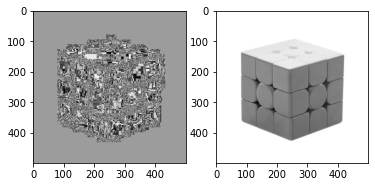

In [8]:
'''初始化'''
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
cube = cv2.imread('figures/magic_cube.jpg') #BGR 格式
'''转灰色，第一种办法'''
b,g,r = cube[:,:,0],cube[:, : ,1],cube[:, : ,2]
cube_gray1 = (30*r + 59*g +11*b) *0.01

'''转灰色，第二种办法'''
cube_gray2 = cv2.cvtColor(cube,cv2.COLOR_BGR2GRAY)


plt.subplot(121)
plt.imshow(cube_gray1,cmap='gray')
plt.subplot(122)
plt.imshow(cube_gray2,cmap='gray')
plt.show()


步骤
    1.使用cv2.threshold函数改变角点图中大于最大值10%处的像素值。我们将阈值图像转换为一个8位的无符号整数.
    2.希望使用cv2.connectedComponentsWithStats函数计算角点的中心点。这解决了多个角点彼此之间非常近的情况。这可能是因为存在一些噪声或者不适合的参数，或者实际上附近可能有多个角点.
    3.把中心点连同停止标准一起传递给cv2.cornerSubPix函数。这个停止标准定义了何时停止迭代的条件.
    4.然后，我们把这些新的角点转换回整数类型
    5.最后，画出这些新的点